# 1. Get Toy Data
- Let's generate a simple toy data set representing web-session data
    - with 3 different classes
    - with simple intuitive features
        - Other than some super simple dummy-encoding of categoricals, we won't go into feature engineering

imports

In [1]:
# for plottign
import matplotlib.pyplot as plt
# for numerical transformations
import numpy as np
# for data frame (i.e. table) manipulations
import pandas as pd
# to easily generate a data set with a classification signal in it
from sklearn.datasets import make_classification

notebook variables

In [2]:
# declare whether or not to print some feedback
verbose = True

I'd like to start with the following columns

In [3]:
# initialize a empty data frame
web_sesh_df = pd.DataFrame(
    # declare the column headers with empty columns for now
    data = {
        # hour of day (0-24) as float
        'start_time':[],
        # weekday (0-7) treat as int (although it should properly be understood as a categorical)
        'weekday':[],
        # boolean indicator of whether or not the session is on a chrome browser
        'chrome_browser':[],
        # boolean indicator of whether or not the session is on a firefox browser
        'firefox_browser':[],
        # boolean indicator of whether or not the session is on a mobile device
        'mobile_device':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_faq':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_faq':[],
        # the last page a session interacted with; and the prediction target
        'TARGET_PAGE':[]
        
    }
)

# display the column headers
if verbose:
    feedback = 'Initialized web-session data-frame with info:\n'
    feedback += '-'*len(feedback)
    print(feedback)
    print(web_sesh_df.info())

Initialized web-session data-frame with info:
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       0 non-null      float64
 1   weekday          0 non-null      float64
 2   chrome_browser   0 non-null      float64
 3   firefox_browser  0 non-null      float64
 4   mobile_device    0 non-null      float64
 5   1st_page_search  0 non-null      float64
 6   1st_page_faq     0 non-null      float64
 7   2nd_page_search  0 non-null      float64
 8   2nd_page_faq     0 non-null      float64
 9   TARGET_PAGE      0 non-null      float64
dtypes: float64(10)
memory usage: 124.0 bytes
None


Note the data-frame is currently empty

In [4]:
web_sesh_df.head()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE


## Ok, let's epxlore how `make_classification` works
**Start with something simple**

In [5]:
# keep it simple with a 2d plottable data set
X,y = make_classification(
    n_samples = 1000,
    # only two features for 2d plotting
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 1,
    n_clusters_per_class = 1,
)

In [6]:
# take a look at the first 5 samples
X[:5]

array([[ 1.53682958, -1.39869399],
       [ 1.36917601, -0.63734411],
       [ 0.50231787, -0.45910529],
       [ 1.83319262, -1.29808229],
       [ 1.04235568,  1.12152929]])

In [7]:
# take a look at the first 5 samples
X[:5, 0]

array([1.53682958, 1.36917601, 0.50231787, 1.83319262, 1.04235568])

In [8]:
y[:5]

array([1, 1, 1, 1, 0])

In [9]:
# could put it into a df if I wanted to
toy_df = pd.DataFrame(
   data =  {
       # get every row, but the first column of X
       'feature_1': X[:,0],
       # get every row but the second col
       'feature_2': X[:,1],
       'BINARY_TARGET':y
   }
)
# display the toy data set
toy_df.head()

,feature_1,feature_2,BINARY_TARGET
0,1.536830,-1.398694,1
1,1.369176,-0.637344,1
2,0.502318,-0.459105,1
3,1.833193,-1.298082,1
4,1.042356,1.121529,0


**plot what the generated classes look like in 2d space**

[]

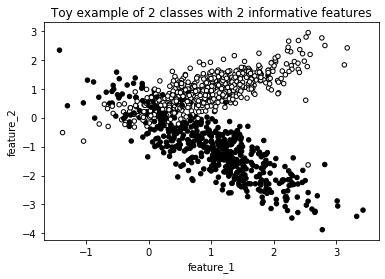

In [10]:
toy_df.plot.scatter(
    x = 'feature_1',
    y = 'feature_2',
    # set the color
    c = 'BINARY_TARGET',
    edgecolors = 'k',
    colorbar = False,
)
plt.title('Toy example of 2 classes with 2 informative features')
plt.plot()

### repeat the vis but with 2 clusters per class

In [11]:
# keep it simple with a 2d plottable data set
X,y = make_classification(
    n_samples = 5000,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 1,
    n_clusters_per_class = 2,
)

In [12]:
# could put it into a df if I wanted to
toy_df = pd.DataFrame(
   data =  {
       # get every row, but the first column of X
       'feature_1': X[:,0],
       # get every row but the second col
       'feature_2': X[:,1],
       'BINARY_TARGET':y
   }
)
# display the toy data set
toy_df.head()

,feature_1,feature_2,BINARY_TARGET
0,-0.875616,-0.977599,1
1,-0.541799,1.038633,0
2,-0.713956,-1.173781,0
3,0.463707,-1.121944,1
4,-1.581774,2.230862,0


[]

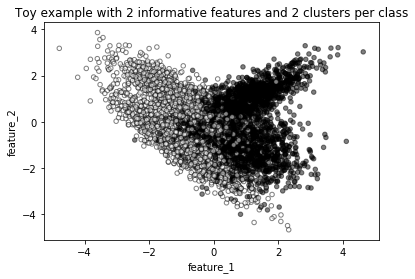

In [13]:
toy_df.plot.scatter(
    x = 'feature_1',
    y = 'feature_2',
    # set the color
    c = 'BINARY_TARGET',
    edgecolors = 'k',
    colorbar = False,
    alpha = .5
)
plt.title('Toy example with 2 informative features and 2 clusters per class')
plt.plot()

Ok. Now that we're comfortable with how `make_classification` works, 
## let's generate the toy data to fit my empty data frame

Generate some toy data to put into the data frame

In [14]:
# Generate some toy data to put into the data frame
X,y = make_classification(
    # generate 100,000 rows
    n_samples = 100000,
    # set the number of features to the width of the data minus the target column
    n_features = web_sesh_df.shape[1] - 1,
    # let's assume all the columns are informative except for the two browser features, so that's 7
    n_informative = 7,
    # declare number of target pages/classes to predict (keep it simple at 3)
    n_classes = 3,
    # declare the number of clusters per class
    n_clusters_per_class = 1
)

# unpack each column in X into columns of a data frame
for i in range(X.shape[1]):
    # get the corresponding column in the data frame
    col = web_sesh_df.columns[i]
    # assign the column in X to the column in the df
    web_sesh_df[col] = X[:,i]

# assign the target column
web_sesh_df['TARGET_PAGE'] = y
    
# take a look at the data now
web_sesh_df.head()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
0,0.815486,-0.116862,-0.409612,-0.196160,0.748555,0.542850,3.113630,-0.730980,-2.611782,1
1,1.418899,0.088696,1.567158,3.052181,-0.361921,3.691398,-1.917444,-2.952842,-6.047242,2
2,2.264121,0.140315,0.063504,3.580166,-1.390571,3.638627,-0.141968,-2.080164,-9.511870,2
3,2.618426,0.544952,-1.655893,-1.164895,2.751693,-1.049640,1.230035,2.014013,0.987807,0
4,-2.184041,-2.125415,2.155363,-1.898766,-0.024651,-3.127868,-0.288101,-1.005808,6.361873,1


In [15]:
# display the data frames info now
web_sesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_time       100000 non-null  float64
 1   weekday          100000 non-null  float64
 2   chrome_browser   100000 non-null  float64
 3   firefox_browser  100000 non-null  float64
 4   mobile_device    100000 non-null  float64
 5   1st_page_search  100000 non-null  float64
 6   1st_page_faq     100000 non-null  float64
 7   2nd_page_search  100000 non-null  float64
 8   2nd_page_faq     100000 non-null  float64
 9   TARGET_PAGE      100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


Cool! Note that I won't be trying to make any plots because the data is now 9 dimensional.

## manipulate the values so they make intuitive sense according to their column headers

In [16]:
# take a look at the summary
web_sesh_df.describe()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.324533,0.331937,-0.231314,-0.334463,0.327167,0.341944,0.998863,-0.342552,-0.626933,1.000240
std,1.934174,1.685058,2.005968,1.592556,1.751632,1.871425,1.533308,1.943448,4.527019,0.816435
min,-9.302906,-5.652355,-7.915069,-6.631815,-6.230912,-6.963513,-6.403834,-8.390580,-18.720021,0.000000
25%,-0.970251,-0.874892,-1.626084,-1.434431,-0.902159,-0.982749,-0.018803,-1.683169,-3.790371,0.000000
50%,0.374737,0.314674,-0.306333,-0.527828,0.317462,0.277909,1.000905,-0.430587,-0.793565,1.000000
75%,1.668526,1.513145,1.092135,0.608778,1.540401,1.604369,2.015708,0.906162,2.365583,2.000000
max,8.309055,7.365155,9.997827,7.400382,7.761780,8.588750,8.447147,8.387118,22.087750,2.000000


**interpolate start_time on a 0-24 range, to represent hours in a day**

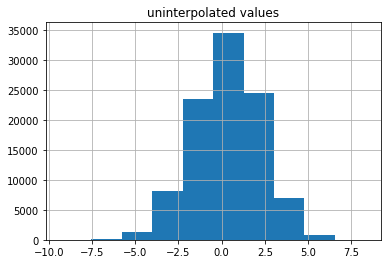

In [17]:
# take a look at its current distribution
web_sesh_df.start_time.hist()
plt.title('uninterpolated values')
plt.show()

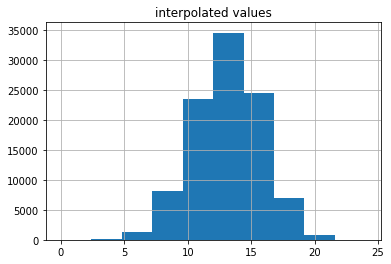

In [18]:
web_sesh_df['start_time'] = np.interp(
        # the array of values to interpolate
        x = web_sesh_df.start_time,
        # the min and max of the existing range
        xp = (web_sesh_df.start_time.min(), web_sesh_df.start_time.max()),
        # the min and max of the new range
        fp = (0,24),
    )
# display the output as a spot check
web_sesh_df['start_time'].hist()
plt.title('interpolated values')
plt.show()

**interpolate weekday to values from 1-7** I'll skip the plotting this time

In [19]:
# interpolate the values as floats
web_sesh_df['weekday'] = np.interp(
        # the array of values to interpolate
        x = web_sesh_df.weekday,
        # the min and max of the existing range
        xp = (web_sesh_df.weekday.min(), web_sesh_df.weekday.max()),
        # the min and max of the new range
        fp = (1,7),
    )
# convert the values to ints
web_sesh_df['weekday'] = web_sesh_df['weekday'].astype(int)

**ok, what's next?**

In [20]:
web_sesh_df.describe()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
count,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,13.119409,3.2582,-0.231314,-0.334463,0.327167,0.341944,0.998863,-0.342552,-0.626933,1.000240
std,2.635719,0.8300,2.005968,1.592556,1.751632,1.871425,1.533308,1.943448,4.527019,0.816435
min,0.000000,1.0000,-7.915069,-6.631815,-6.230912,-6.963513,-6.403834,-8.390580,-18.720021,0.000000
25%,11.354994,3.0000,-1.626084,-1.434431,-0.902159,-0.982749,-0.018803,-1.683169,-3.790371,0.000000
50%,13.187823,3.0000,-0.306333,-0.527828,0.317462,0.277909,1.000905,-0.430587,-0.793565,1.000000
75%,14.950884,4.0000,1.092135,0.608778,1.540401,1.604369,2.015708,0.906162,2.365583,2.000000
max,24.000000,7.0000,9.997827,7.400382,7.761780,8.588750,8.447147,8.387118,22.087750,2.000000


### interpolate the remaining features as booleans
hopefully this won't alter the clustering too much
- I think it will be fine since I'm just taking a continuous feature and basically drawing a line in the middle and makign it binary

In [21]:
# iterate throug the columns I want to interpolate to booleans
for col in [
    'chrome_browser', 'firefox_browser', 
    'mobile_device', 
    '1st_page_search', '1st_page_faq', 
    '2nd_page_search', '2nd_page_faq'
]:
    # transform them to the boolean series
    web_sesh_df[col] = web_sesh_df[col] >= web_sesh_df[col].median()

web_sesh_df.head()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
0,13.788437,3,False,True,True,True,True,False,False,1
1,14.610714,3,True,True,False,True,False,False,False,2
2,15.762506,3,True,True,False,True,False,False,False,2
3,16.245322,3,False,False,True,False,True,True,True,0
4,9.700950,2,True,False,False,False,False,False,True,1
